In [1]:
# load and visualize the data
from pandas import read_csv
from sklearn import datasets
import pandas as pd
import seaborn as sns
from pandas.plotting import scatter_matrix
# machine learning
from sklearn.model_selection import train_test_split
# compare algorithms
from sklearn.svm import SVC
# Evaluate model
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import plot_confusion_matrix
from sklearn import svm, datasets
import matplotlib.pyplot as plt

In [2]:
# Load dataset
iris = datasets.load_iris()
X = iris.data
y = iris.target
df = pd.DataFrame(X, columns = iris.feature_names)
df['y'] = y

df['y'].replace({0:"Individual sport",
           1: "No sport",
           2: "Team sport"},inplace=True)

df.rename(columns={"sepal length (cm)":"Strength",
                   "sepal width (cm)": "Speed",
                   "petal length (cm)": "TeamInclination",
                   "petal width (cm)": "Height",
                   "y":"SelectedSport"}, inplace= True)

df['Height'] -= 1.5
df['Height'] *= 10
df['Height'] += 180

## To use this slideshow:
- Run All, using the menu item: Kernel/Restart & Run All
- Return to this top cell
- click on "Slideshow" menu item above, that looks like this:
![](images/SlideIcon.png)

![Callysto.ca Banner](https://github.com/callysto/curriculum-notebooks/blob/master/callysto-notebook-banner-top.jpg?raw=true)

<h1 align='center'>The Importance of Ethics in AI</h1>

<h3 align='center'> Zachary Shand, Laura G Funderburk, Byron Chu</h3>

![Callysto.ca License](https://github.com/callysto/curriculum-notebooks/blob/master/callysto-notebook-banner-bottom.jpg?raw=true)

<h2 align='center'>Workshop at a glance</h2>

1. Introductions. 
2. The Callysto program.
2. What is data? What is data science? What is artificial intelligence (AI)?
3. Motivating the importance of ethics in AI. 
4. Working example: individual sport, team sport, or no sport?

    
    

<h2 align='center'> About the Callysto Program</h2>

- Provide open educational infrastructure and learning resources
- Focus on making computational thinking and data science/literacy available
- Use Jupyter notebooks as main platform
- Host teacher and student training workshops

<h3 align='center'>Brought to you by</h3>


| | | |
|-|-|-|
|<img src="./images/Cybera_Logo_RBG_Colour.png" alt="Drawing" width="400"/>|<img src="./images/PIMS_Logos_Web_PIMS_Logo_Colour.png" alt="Drawing" width="400"/>| <img src="./images/With_Funding_Canada_Wordmark-colour_BIL-EN.png" alt="Drawing" width="400"/>|

<h2 align='center'>What is a Jupyter notebook?</h2>

A Jupyter notebook is an online document that can include both text and (Python) code in different “cells” or parts of the document.

These documents run on Callysto Hub as well as Google Colab, IBM Watson Studio, and other places.


This presentation is a Jupyter notebook!

<h2 align='center'>Example: Collecting data on people's preferred season</h2>


In [24]:
# Collect data
total_participants = 17
prefer_spring = 2
prefer_summer = 1
prefer_fall = 10
prefer_winter = 2
no_answer = total_participants - (prefer_spring + prefer_summer + prefer_fall + prefer_winter)

In [4]:
import pandas as pd
answer = {"Season": ["Spring", "Summer", "Fall", "Winter", "No answer"],
           "Count": [prefer_spring, prefer_summer, prefer_fall, prefer_winter, no_answer]}

answer_table = pd.DataFrame(answer)
answer_table

,Season,Count
0,Spring,5
1,Summer,10
2,Fall,10
3,Winter,5
4,No answer,0


<h2 align='center'>Example: Visualizing data</h2>

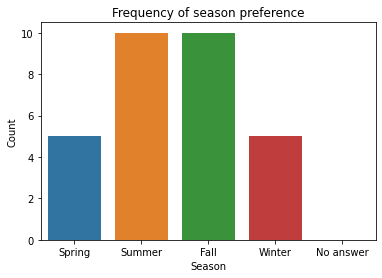

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.barplot(x = answer_table["Season"], y =  answer_table['Count'])
plt.title("Frequency of season preference")
plt.ylabel("Count")
plt.xlabel("Season")
plt.show()

<h2 align='center'>What is Data?</h2>

<center><img src="https://img2.pngio.com/download-free-png-19-data-graph-icon-packs-vector-icon-packs-data-graph-png-600_564.png" width="400"></center>

<h2 align='center'>What is Data Science?</h2>

Data science involves <b>obtaining</b> and <b>communicating</b> information from (usually large) sets of observations.


| |
|-|
| <img src="./images/what-is-data-science-workflow.jpg" alt="Drawing" width="800"/> |



<h2 align='center'>What is Machine Learning?</h2>


Machine Learning (ML) algorithms are programs that improve, or “learn”, through exposure to data/experience.

ML is based on the idea that machines should be able to learn and adapt through experience. 

<h2 align='center'>What is Artificial Intelligence?</h2>

Artificial Intelligence (AI) is a blanket term describing all efforts to make computer “think”.


AI refers to a broader idea where machines can execute tasks "smartly."


<h2 align='center'>Motivating the role of ethics in AI</h2>


* Increase in the use of artificial intelligence in our everyday lives.

    1. ML algorithms that screen resumes for job postings, to assign credit scores
    2. Robotics (self driving cars)
    3. YouTube algorithms to suggest content
    


<h2 align='center'>Motivating the role of ethics in AI</h2>

    
* Using AI to make decisions impacting lives, or access to resources.

    1. Determine who gets into university.
    2. Determine the outcome of a criminal case.
    3. Use online metadata to determine and predict behaviour.

<h2 align='center'> What are the potential impacts on education and society, and how do we talk to students about all of this? </h2>

- What are the consequences of wrong assignments via a ML-based outcome?

- How do we mitigate and minimize erros?

- How do we measure errors and limitations? 

Predictions will be made based on training data that is provided.

$\Rightarrow$ bias in training data increases probability for bias in predicted outcome. 


<h2 align='center'>Real examples</h2>

Amazon ditches AI recruiting tool that didn’t like women (Reuters) [link](https://www.reuters.com/article/us-amazon-com-jobs-automation-insight-idUSKCN1MK08G)


Can Racist Algorithms Be Fixed? (The Marshall Project) [link](https://www.themarshallproject.org/2019/07/01/can-racist-algorithms-be-fixed)


Black and Asian faces misidentified more often by facial recognition software (CBC) [link](https://www.cbc.ca/news/technology/facial-recognition-race-1.5403899)


UK ditches exam results generated by biased algorithm after student protests (The Verge) [link](https://www.theverge.com/2020/8/17/21372045/uk-a-level-results-algorithm-biased-coronavirus-covid-19-pandemic-university-applications)

<h2 align='center'>Example: individual vs team sport assignment</h2>

Data has been collected from 150 students (all 18 years old) in three groups: 

1. 50 students excelled in team sports (football, basketball, hockey)

2. 50 students excelled in individual sports (swimming, cycling, snowboarding)

3. 50 students did not excel in any sports.

This data set is hypothetical.

The students were scored by the same coach in the same school. The following parameters were collected.

1. Team work skills (coach score)

2. Speed (coach score)

3. Strength (coach score)

4. Height (measurement)

<h4 align='center'>Goal: given new data from students, use an algorithm that will recommend whether the student should pick individual sports, team sports or no sports.</h4>

<h2 align='center'>Discussion: Identifying pitfalls early</h2>

What problems can you identify in this problem statement? 


<h2 align='center'>Discussion: Identifying pitfalls early</h2>

What biases in the data can you identify?


<h2 align='center'>Discussion: Identifying pitfalls early</h2>


What are the consequences of those biases when the algorithm is in action? 

Who is left out of activities, who is included in activities?

<h2 align='center'> Machine learning technique </h2>

Split data set into training and testing data.

We will provide random data points for the algorithm to "learn" (training set). 

We will test how well the model does by providing the testing set to the algorithm after it trains. 


<h2 align='center'>Training the model with data</h2>

* Determine the <b>independent</b> and <b>dependent</b> variables.

* Split data into two sets: 

    1. <b>Training set.</b>

    2. <b>Testing set.</b>

* Compare the <b>predictions</b> against the <b>true results</b>, evaluate false positives and false negatives.

In [27]:
array = df.values
# All measurements
X = array[:,0:4]
# All classes
y = array[:,4]
# Split-out validation dataset
X_train, X_validation, Y_train, Y_validation = train_test_split(X, y,  
                                                                test_size=0.20, 
                                                                random_state=1, 
                                                                shuffle=True)

We will use Support Vector Machines (SVM) - a type of algorithm exploring non-linear relationships.

In [7]:
# Make predictions on validation dataset
model = SVC(gamma='auto') 
model.fit(X_train, Y_train)
predictions = model.predict(X_validation)

In [8]:
print(accuracy_score(Y_validation, predictions))

0.9666666666666667


We can see that the accuracy is 0.966 or about 96% on the hold out dataset.

In [9]:
print(classification_report(Y_validation, predictions))

                  precision    recall  f1-score   support

Individual sport       1.00      1.00      1.00        11
        No sport       1.00      0.92      0.96        13
      Team sport       0.86      1.00      0.92         6

        accuracy                           0.97        30
       macro avg       0.95      0.97      0.96        30
    weighted avg       0.97      0.97      0.97        30



The metrics are calculated by using true and false positives, true and false negatives.



Precision is the ability of a classifier not to label an instance positive that is actually negative.

Recall is the ability of a classifier to find all positive instances. For each class, it is the ratio of true positives to the sum of true positives and false negatives.

F1-score is the average of precision and recall, where each of the two measurements are given equal weight. 1.0 is the best score, 0.0 is the worst score. 

The support is the number of samples of the true response that lie in that class.

 The diagonal elements represent the number of points for which the predicted label is equal to the true label, while off-diagonal elements are those that are mislabeled by the classifier. 

<h2 align='center'>Application Results</h2>

* Used at school, 75% of female studensts calssified as "No Sport"

* Data has been collected from 150 **male** students (all **18 years old**) in **three sports**:

* How can we address?

<h2 align='center'>Process</h2>

1. Get familiar with the data (table, summary statistics, plots)

2. Training the model with data

3. Evaluate model accuracy

4. Report findings

<h2 align='center'>Manage & Clean Data</h2>

In [31]:
df.sample(10)

,Strength,Speed,TeamInclination,Height,SelectedSport
20,5.4,3.4,1.7,167.0,Individual sport
49,5.0,3.3,1.4,167.0,Individual sport
3,4.6,3.1,1.5,167.0,Individual sport
115,6.4,3.2,5.3,188.0,Team sport
35,5.0,3.2,1.2,167.0,Individual sport
69,5.6,2.5,3.9,176.0,No sport
116,6.5,3.0,5.5,183.0,Team sport
84,5.4,3.0,4.5,180.0,No sport
62,6.0,2.2,4.0,175.0,No sport
92,5.8,2.6,4.0,177.0,No sport


In [13]:
df['SelectedSport'].unique()

array(['Individual sport', 'No sport', 'Team sport'], dtype=object)

<h2 align='center'>Exploratory analysis</h2>

<h3 align='center'>Getting summary stats for all students</h3>

In [32]:
#df
df.describe()

,Strength,Speed,TeamInclination,Height
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,176.993333
std,0.828066,0.435866,1.765298,7.622377
min,4.300000,2.000000,1.000000,166.000000
25%,5.100000,2.800000,1.600000,168.000000
50%,5.800000,3.000000,4.350000,178.000000
75%,6.400000,3.300000,5.100000,183.000000
max,7.900000,4.400000,6.900000,190.000000


<h3 align='center'> Getting summary stats for specific activities</h3>

In [17]:
individual = df[df['SelectedSport']=='Individual sport']
no_sport = df[df['SelectedSport']=='No sport']
team_sport = df[df['SelectedSport']=='Team sport']


team_sport.describe()

,Strength,Speed,TeamInclination,Height
count,50.00000,50.000000,50.000000,50.000000
mean,6.58800,2.974000,5.552000,185.260000
std,0.63588,0.322497,0.551895,2.746501
min,4.90000,2.200000,4.500000,179.000000
25%,6.22500,2.800000,5.100000,183.000000
50%,6.50000,3.000000,5.550000,185.000000
75%,6.90000,3.175000,5.875000,188.000000
max,7.90000,3.800000,6.900000,190.000000


<h3 align='center'>Generating visualization from summary stats</h3>

In [18]:
import ipywidgets as widgets
from IPython.display import display
dropdowna = widgets.Dropdown(
    options=['Strength', 'Speed', 'TeamInclination','Height'],
    value='Strength',
    description='Item:',
    disabled=False,
)

In [19]:
df

,Strength,Speed,TeamInclination,Height,SelectedSport
0,5.1,3.5,1.4,167.0,Individual sport
1,4.9,3.0,1.4,167.0,Individual sport
2,4.7,3.2,1.3,167.0,Individual sport
3,4.6,3.1,1.5,167.0,Individual sport
4,5.0,3.6,1.4,167.0,Individual sport
...,...,...,...,...,...
145,6.7,3.0,5.2,188.0,Team sport
146,6.3,2.5,5.0,184.0,Team sport
147,6.5,3.0,5.2,185.0,Team sport
148,6.2,3.4,5.4,188.0,Team sport


<h3 align='center'> Generating distribution visualization </h3>

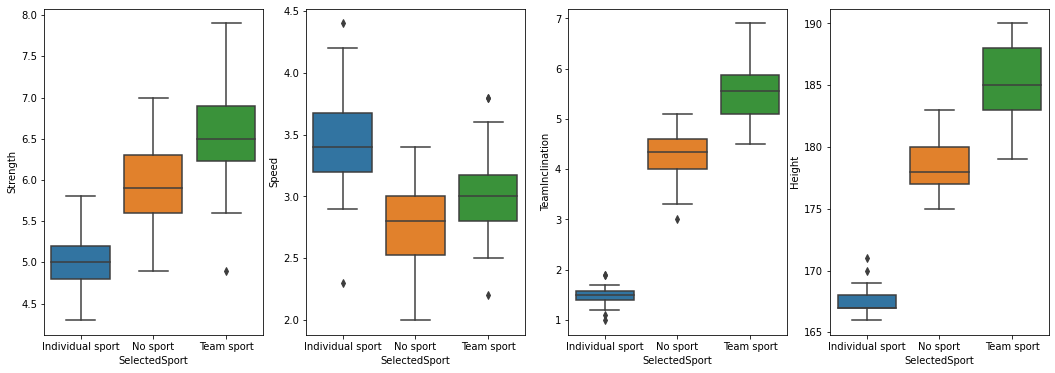

In [20]:
fig, axs = plt.subplots(1,4)
fig.set_size_inches(18,6)
for col, ax in zip( df.columns[0:4], axs):
    sns.boxplot(x='SelectedSport', y=col, data=df, ax=ax)

<h2 align='center'>Insights</h2>

| Activity | Team affinity | Speed | Strength | Height|
| -    | -          | -     | -        | -     |
|Independent sport|Lowest |Highest  | Lowest | Lowest |
|No sport|Medium|Lowest|  Medium| Medium |
|Team sport|Highest|Medium| Highest| Highest |


<h2 align='center'>Were These the Right Variables?</h2>

Independent variables (or variables we use to predict):

1. Team affinity
2. Speed
3. Strength
4. Height

Dependent variable (or the variable we want to predict):

Type of activity

<h2 align='center'> What can we do? </h2>

- Work towards addressing our own biases in the classroom and daily life

- Identify how our biases play a role in our decision making

- Identify how our biases affect the machines we program 

- Collaborate with people offering diverse points of view

![Callysto.ca Banner](https://github.com/callysto/curriculum-notebooks/blob/master/callysto-notebook-banner-top.jpg?raw=true)

<h2 align='center'>Getting Started with Callysto</h2>

- Feedback form https://tinyurl.com/y2a3uhdt
- Online self-paced courses (courses.callysto.ca)  
- Preview our learning modules https://callysto.github.io/curriculum-jbook/intro.html
- Contact us for “in-class” workshops, teacher PD, virtual hackathons, and more

Email: contact@callysto.ca

On Twitter: @callysto_canada

Site: https://www.callysto.ca

YouTube https://www.youtube.com/channel/UCPdq1SYKA42EZBvUlNQUAng 

<h2 align='center'> Callysto notebooks ready for you to use</h2>

On our website callysto.ca you will find lesson plans, courses and learning modules that support you incorporate coding into your stats lesson. 

#### Objective: explore how we can use Callysto to explore machine learning in the classroom


| |
|-|
|<img src="./images/samplenotebooks.png" width="600">|



<h1 align='center'>Thank You! </h1> 
   <h2 align='center'>Session Feedback </h2>

<div align='center'>
<img src="./images/callysto_feedback_qr_code.png" width="680">
<a style="font-size:26px" align='center' href=https://bit.ly/callysto-feedback>https://bit.ly/callysto-feedback</a>
</div>
    
<h2 align='center'>

</h2>

[![Callysto.ca License](https://github.com/callysto/curriculum-notebooks/blob/master/callysto-notebook-banner-bottom.jpg?raw=true)](https://github.com/callysto/curriculum-notebooks/blob/master/LICENSE.md)